# Previsão de renda

### 4 elementos importantes
- Esse notebook
- Streamlit com as análises
- Seu Github com o projeto
- Vídeo no readme do github mostrando o streamlit

## Etapa 1 CRISP - DM: Entendimento do negócio


Definimos o que será previsto, a renda, e exploramos como essa previsão pode beneficiar o negócio. Identificamos as partes interessadas e suas expectativas, estabelecendo critérios de sucesso e métricas para avaliação. Além disso, levamos em consideração eventuais restrições e recursos disponíveis para o desenvolvimento do modelo.


## Etapa 2 Crisp-DM: Entendimento dos dados


Realizamos uma exploração inicial para compreender a estrutura dos dados, seus atributos e a distribuição dos valores. Verificamos a qualidade dos dados, tratando valores ausentes e inconsistências, garantindo a integridade das informações. Identificamos padrões e tendências relevantes nos dados e selecionamos as variáveis que serão relevantes para a previsão de renda.


### Dicionário de dados



| Variável                | Descrição                                           | Tipo         |
| ----------------------- |:---------------------------------------------------:| ------------:|
| data_ref                |  Data de referência                                      | datetime|
| id_cliente              |  id do cliente                                     | int|
| sexo                    |  sexo do cliente                                     | string|
| posse_de_veiculo        |  possui veículo?                                      | bool|
| posse_de_imovel         |  possui imóvel?                                     | bool|
| qtd_filhos              |  Quantidade de filhos                                      | int|
| tipo_renda              |  Tipo de renda (fonte)                                      | string|
| educacao                |  formação                                     | string|
| estado_civil            |  estado civil                                      | string|
| tipo_residencia         |  tipo de residencia                                      | string|
| idade                   |  idade do cliente                                      | int|
| tempo_emprego           |  tempo que o cliente possui de emprego                                      | float|
| qt_pessoas_residencia   |  quantidade de pessoas na residencia                                      | int|
| renda                   |  renda doc liente                                     | float|





#### Carregando os pacotes
É considerado uma boa prática carregar os pacotes que serão utilizados como a primeira coisa do programa.

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import statsmodels.formula.api as smf

#### Carregando os dados
O comando pd.read_csv é um comando da biblioteca pandas (pd.) e carrega os dados do arquivo csv indicado para um objeto *dataframe* do pandas.

In [39]:
renda = pd.read_csv('./input/previsao_de_renda.csv')

In [3]:
renda.head(1)

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.60274,1.0,8060.34


#### Entendimento dos dados - Univariada
Nesta etapa tipicamente avaliamos a distribuição de todas as variáveis. 

In [4]:
prof = ProfileReport(renda, explorative=True, minimal=True)
prof


In [5]:
prof.to_file('./output/renda_analisys.html')

### Entendimento dos dados - Bivariadas




In [4]:
renda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   id_cliente             15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12427 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  renda                  15000 non-null  float64
dtypes:

In [5]:
renda.isna().sum()

Unnamed: 0                  0
data_ref                    0
id_cliente                  0
sexo                        0
posse_de_veiculo            0
posse_de_imovel             0
qtd_filhos                  0
tipo_renda                  0
educacao                    0
estado_civil                0
tipo_residencia             0
idade                       0
tempo_emprego            2573
qt_pessoas_residencia       0
renda                       0
dtype: int64

## Etapa 3 Crisp-DM: Preparação dos dados
Nessa etapa realizamos tipicamente as seguintes operações com os dados:

 - **seleção**: Já temos os dados selecionados adequadamente?
 - **limpeza**: Precisaremos identificar e tratar dados faltantes
 - **construção**: construção de novas variáveis
 - **integração**: Temos apenas uma fonte de dados, não é necessário integração
 - **formatação**: Os dados já se encontram em formatos úteis?



In [40]:
renda = (renda.drop('Unnamed: 0', axis=1)
        .assign(data_ref = lambda x: pd.to_datetime(x['data_ref']))
        .assign(qt_pessoas_residencia = lambda x: x['qt_pessoas_residencia'].astype(int))
        .fillna(0)
        .assign(tempo_emprego=lambda x: np.where(x['tempo_emprego'] < 0, 0, x['tempo_emprego']))
        )


## Etapa 4 Crisp-DM: Modelagem
Nessa etapa que realizaremos a construção do modelo. Os passos típicos são:
- Selecionar a técnica de modelagem
- Desenho do teste
- Avaliação do modelo


### Rodando o modelo


In [11]:
# Dividir os dados em conjunto de treinamento e conjunto de teste
train, test = train_test_split(renda, test_size=0.25, random_state=42)

# Criando modelo
results = smf.ols('''
                    renda ~ sexo 
                                + posse_de_veiculo 
                                + posse_de_imovel
                                + qtd_filhos
                                + tipo_renda
                                + tipo_renda
                                + educacao
                                + estado_civil
                                + tipo_residencia
                                + idade
                                + tempo_emprego
                                
                  ''', train).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.260
Model:                            OLS   Adj. R-squared:                  0.258
Method:                 Least Squares   F-statistic:                     171.2
Date:                Sun, 06 Aug 2023   Prob (F-statistic):               0.00
Time:                        20:27:50   Log-Likelihood:            -1.1577e+05
No. Observations:               11250   AIC:                         2.316e+05
Df Residuals:                   11226   BIC:                         2.318e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                        -2417.1015    946.516     -2.554      0.011   -4272.440    -561.763
sexo[T.M]                         5844.4888    159.630     36.613      0.000    5531.585    6157.392
posse_de_veiculo[T.True]             3.5667    150.978      0.024      0.981    -292.376     299.510
posse_de_imovel[T.True]            297.4330    148.604      2.002      0.045       6.144     588.722
tipo_renda[T.Bolsista]           -1183.7688   2919.694     -0.405      0.685   -6906.880    4539.342
tipo_renda[T.Empresário]           862.6365    170.101      5.071      0.000     529.208    1196.065
tipo_renda[T.Pensionista]         2823.1945    274.627     10.280      0.000    2284.878    3361.511
tipo_renda[T.Servidor público]      85.9560    257.984      0.333      0.739    -419.739     591.651
educacao[T.Pós graduação]         1162.8626   1845.084      0.630      0.529   -2453.825    4779.551
educacao[T.Secundário]             153.0145    630.757      0.243      0.808   -1083.380    1389.409
educacao[T.Superior completo]      800.1144    636.199      1.258      0.209    -446.948    2047.177
educacao[T.Superior incompleto]   -351.6397    717.948     -0.490      0.624   -1758.943    1055.664
estado_civil[T.Separado]          -147.9704    290.716     -0.509      0.611    -717.825     421.885
estado_civil[T.Solteiro]          -493.9234    215.461     -2.292      0.022    -916.264     -71.583
estado_civil[T.União]             -314.7677    266.383     -1.182      0.237    -836.926     207.390
estado_civil[T.Viúvo]              -62.9169    332.336     -0.189      0.850    -714.355     588.521
tipo_residencia[T.Casa]           -150.7755    620.281     -0.243      0.808   -1366.636    1065.085
tipo_residencia[T.Com os pais]    -175.1951    693.481     -0.253      0.801   -1534.540    1184.149
tipo_residencia[T.Comunitário]    -297.7308   1170.831     -0.254      0.799   -2592.765    1997.303
tipo_residencia[T.Estúdio]         898.9850   1080.277      0.832      0.405   -1218.547    3016.517
tipo_residencia[T.Governamental]   628.6055    728.746      0.863      0.388    -799.865    2057.076
qtd_filhos                          88.1740     98.839      0.892      0.372    -105.568     281.916
idade                               35.4304      8.730      4.059      0.000      18.319      52.542
tempo_emprego                      551.1839     11.741     46.944      0.000     528.169     574.199
==============================================================================
Omnibus:                    16794.156   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         13400669.346
Skew:                           8.931   Prob(JB):                         0.00
Kurtosis:                     171.134   

In [44]:
# Tunando
rsqr = []
alphal = []

for alpha in np.arange(0.01, 1.00, 0.01):
    modelo = '''
                        renda ~ sexo
                                    + posse_de_imovel
                                    + tipo_renda
                                    + tipo_renda
                                    + idade
                                    + tempo_emprego        
                      '''
    md = smf.ols(modelo, data = train)
    reg = md.fit_regularized(method = 'elastic_net' 
                             , refit = True
                             , L1_wt = 1
                             , alpha = alpha)

    x = reg.rsquared
    
    rsqr.append(x)
    alphal.append(alpha)


In [66]:
modelo = '''
            renda ~ sexo
                        + tipo_renda
                        + tipo_renda
                        + idade
                        + tempo_emprego        
          '''
md = smf.ols(modelo, data = train)
reg = md.fit_regularized(method = 'elastic_net' 
                         , refit = True
                         , L1_wt = 1
                         , alpha = 1)

train['resid'] = reg.resid
train['pred'] = reg.fittedvalues
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.257
Model:                            OLS   Adj. R-squared:                  0.257
Method:                 Least Squares   F-statistic:                     555.3
Date:                Sun, 06 Aug 2023   Prob (F-statistic):               0.00
Time:                        21:04:50   Log-Likelihood:            -1.1579e+05
No. Observations:               11250   AIC:                         2.316e+05
Df Residuals:                   11243   BIC:                         2.317e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                      -2037.5605    342.173     -5.955      0.000   -2708.279   -1366.842
sexo[T.M]                       5850.6664    148.824     39.313      0.000    5558.946    6142.387
tipo_renda[T.Bolsista]                  0          0        nan        nan           0           0
tipo_renda[T.Empresário]         907.9835    168.779      5.380      0.000     577.148    1238.819
tipo_renda[T.Pensionista]       2778.6662    273.351     10.165      0.000    2242.849    3314.483
tipo_renda[T.Servidor público]   197.5590    256.607      0.770      0.441    -305.435     700.553
idade                             35.3741      8.091      4.372      0.000      19.514      51.234
tempo_emprego                    550.6443     11.713     47.012      0.000     527.685     573.603
==============================================================================
Omnibus:                    16771.419   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         13297425.513
Skew:                           8.908   Prob(JB):                         0.00
Kurtosis:                     170.483   Cond. No.                     1.99e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.99e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

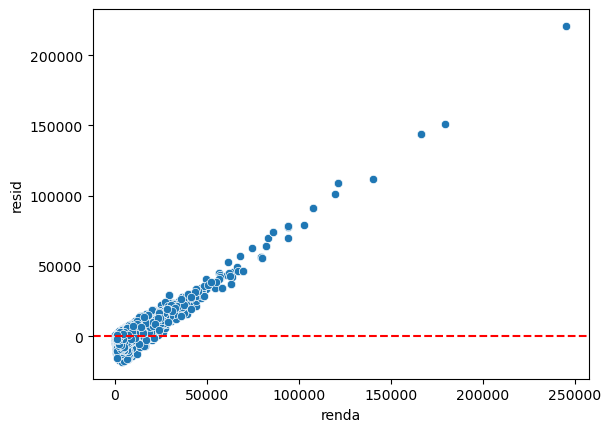

In [64]:
sns.scatterplot(x = 'renda', y = 'resid', data = train)
plt.axhline(y=0, color='r', linestyle='--')

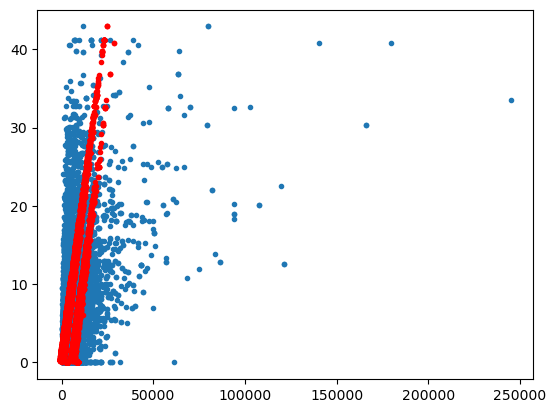

In [67]:
plt.plot(train['renda'], train['tempo_emprego'], '.')
plt.plot(train['pred'], train['tempo_emprego'], 'r.')

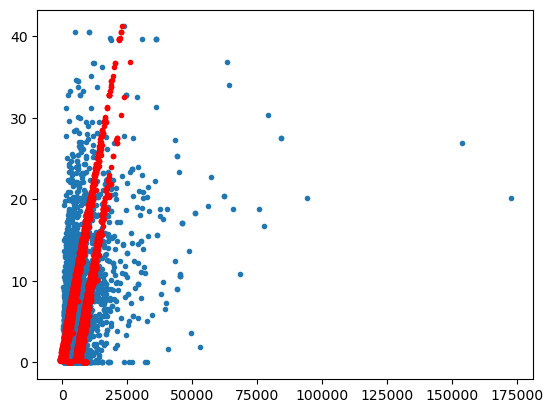

In [68]:
test['pred'] = reg.predict(test)

plt.plot(test['renda'], test['tempo_emprego'], '.')
plt.plot(test['pred'], test['tempo_emprego'], 'r.')

## Etapa 5 Crisp-DM: Avaliação dos resultados


O modelo consegue prever os resultados com baixa precisão, apresentando baixo valor de r²

## Etapa 6 Crisp-DM: Implantação
Nessa etapa colocamos em uso o modelo desenvolvido, normalmente implementando o modelo desenvolvido em um motor que toma as decisões com algum nível de automação.

arquivo .py